# 01 - Bezirke und Bevoelkerung

**Ziel:** Bereitet Bezirksgrenzen und Bevoelkerungsdaten als Basisdatensatz auf.

**Inputs:** data/raw/muc_stadtbezirke.geojson, data/raw/bev_stadtbezirke.csv

**Outputs:** data/interim/muc_bezirke_bev_clean.geojson

**Ausfuehrung:** Von oben nach unten ausfuehren (Restart & Run All). Dieses Notebook ist Teil der Pipeline 00 -> 05.


## Setup

In [1]:
from pathlib import Path

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Basispfad -> anpassen, falls dein Projektordner anders heißt
BASE_DIR = Path("..")  # im Notebook-Ordner eine Ebene nach oben
RAW_DIR = BASE_DIR / "data" / "raw"
INTERIM_DIR = BASE_DIR / "data" / "interim"

RAW_DIR, INTERIM_DIR


(PosixPath('../data/raw'), PosixPath('../data/interim'))

## Daten Laden

In [2]:
# GeoJSON der Stadtbezirke laden
gdf_bezirke = gpd.read_file(RAW_DIR / "muc_stadtbezirke.geojson")
print(gdf_bezirke.shape)
gdf_bezirke.head()


(27, 8)


,id,objectid,x,y,sb_nummer,name,flaeche_qm,geometry
0,vablock_stadtbezirke_opendata.1,2,690961.6772,5.337944e+06,04,Schwabing-West,4.363287e+06,"POLYGON ((691821.837 5339259.125, 691767.291 5..."
1,vablock_stadtbezirke_opendata.2,20,687008.1953,5.328879e+06,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1.776349e+07,"POLYGON ((685540.466 5327534.649, 685543.41 53..."
2,vablock_stadtbezirke_opendata.3,20,687008.1953,5.328879e+06,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1.776349e+07,"POLYGON ((689968.496 5331316.396, 689963.03 53..."
3,vablock_stadtbezirke_opendata.4,13,699191.3166,5.333487e+06,15,Trudering-Riem,2.245392e+07,"POLYGON ((698523.625 5337387.299, 698428.438 5..."
4,vablock_stadtbezirke_opendata.5,24,683362.5274,5.336113e+06,21,Pasing-Obermenzing,1.649754e+07,"POLYGON ((682919.357 5338681.106, 682929.131 5..."


In [3]:
# CSV mit Bevölkerungsdaten laden
df_bev = pd.read_csv(RAW_DIR / "bev_stadtbezirke.csv", sep=",", decimal=",")  # Separator je nach Datei
print(df_bev.shape)
df_bev.head()



(26, 7)


,stadtbezirksnummer,stadtbezirk,bevölkerung,bevölkerung in prozent,fläche in ha,fläche in prozent,einwohnerdichte
0,1,Altstadt - Lehel,20876,1.3,314.59,1,66
1,2,Ludwigsvorstadt - Isarvorstadt,50081,3.1,440.17,1.4,114
2,3,Maxvorstadt,52434,3.3,429.82,1.4,122
3,4,Schwabing West,68610,4.3,436.33,1.4,157
4,5,Au - Haidhausen,63972,4,422.00,1.4,152


# Hauptlogik

## Preparation

### First Check

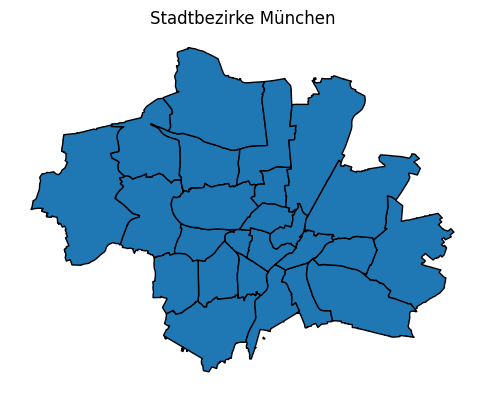

Index(['id', 'objectid', 'x', 'y', 'sb_nummer', 'name', 'flaeche_qm',
       'geometry'],
      dtype='object')

In [4]:
ax = gdf_bezirke.plot(edgecolor="black", figsize=(6, 6))
ax.set_title("Stadtbezirke München")
plt.axis("off")
plt.show()

gdf_bezirke.columns


In [5]:
# Bevölkerung der Stadtbezirke (Stand:31.12.2024)
df_bev.head()

,stadtbezirksnummer,stadtbezirk,bevölkerung,bevölkerung in prozent,fläche in ha,fläche in prozent,einwohnerdichte
0,1,Altstadt - Lehel,20876,1.3,314.59,1,66
1,2,Ludwigsvorstadt - Isarvorstadt,50081,3.1,440.17,1.4,114
2,3,Maxvorstadt,52434,3.3,429.82,1.4,122
3,4,Schwabing West,68610,4.3,436.33,1.4,157
4,5,Au - Haidhausen,63972,4,422.00,1.4,152


### Merging Stadtbezirke + Bevölkerung

In [6]:
# Kopien erstellen
gdf = gdf_bezirke.copy()
dfb = df_bev.copy()

# Beide Nummern auf den gleichen Datentyp bringen (z.B. int)
gdf["bez_nr"] = gdf["sb_nummer"].astype(int)
dfb["bez_nr"] = dfb["stadtbezirksnummer"].astype(int)

# Überprüfen, ob die Sets übereinstimmen
print(sorted(gdf["bez_nr"].unique()))
print(sorted(dfb["bez_nr"].unique()))



[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25)]
[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26)]


In [7]:
# Merge durchführen
gdf_merged = gdf.merge(
    dfb,
    on="bez_nr",
    how="left"  # alle Bezirke behalten, auch wenn mal was in dfb fehlt
)

print(gdf_merged.shape)
gdf_merged.head()



(27, 16)


,id,objectid,x,y,sb_nummer,name,flaeche_qm,geometry,bez_nr,stadtbezirksnummer,stadtbezirk,bevölkerung,bevölkerung in prozent,fläche in ha,fläche in prozent,einwohnerdichte
0,vablock_stadtbezirke_opendata.1,2,690961.6772,5.337944e+06,04,Schwabing-West,4.363287e+06,"POLYGON ((691821.837 5339259.125, 691767.291 5...",4,4,Schwabing West,68610,4.3,436.33,1.4,157
1,vablock_stadtbezirke_opendata.2,20,687008.1953,5.328879e+06,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1.776349e+07,"POLYGON ((685540.466 5327534.649, 685543.41 53...",19,19,Thalkirchen - Obersendling - Forstenried - Für...,103717,6.5,1776.35,5.7,58
2,vablock_stadtbezirke_opendata.3,20,687008.1953,5.328879e+06,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1.776349e+07,"POLYGON ((689968.496 5331316.396, 689963.03 53...",19,19,Thalkirchen - Obersendling - Forstenried - Für...,103717,6.5,1776.35,5.7,58
3,vablock_stadtbezirke_opendata.4,13,699191.3166,5.333487e+06,15,Trudering-Riem,2.245392e+07,"POLYGON ((698523.625 5337387.299, 698428.438 5...",15,15,Trudering - Riem,76280,4.8,2245.39,7.2,34
4,vablock_stadtbezirke_opendata.5,24,683362.5274,5.336113e+06,21,Pasing-Obermenzing,1.649754e+07,"POLYGON ((682919.357 5338681.106, 682929.131 5...",21,21,Pasing - Obermenzing,81804,5.1,1649.75,5.3,50


### Cleaning

In [8]:
# Für die weitere Arbeit nur relevante Spalten auswählen und umbenennen
gdf_work = gdf_merged[[
    "bez_nr",
    "name",          # Bezirksname aus Geo
    "stadtbezirk",   # Bezirksname aus Statistik
    "bevölkerung",
    "fläche in ha",
    "einwohnerdichte",
    "geometry",
]].rename(columns={
    "bevölkerung": "einwohner",
    "fläche in ha": "flaeche_ha",
})


In [9]:
gdf_work = gdf_work.sort_values("bez_nr").reset_index(drop=True)
gdf_work.head(30)

,bez_nr,name,stadtbezirk,einwohner,flaeche_ha,einwohnerdichte,geometry
0,1,Altstadt-Lehel,Altstadt - Lehel,20876,314.59,66,"POLYGON ((692704.77 5336941.154, 692682.921 53..."
1,2,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt - Isarvorstadt,50081,440.17,114,"POLYGON ((689722.841 5335359.37, 689570.385 53..."
2,3,Maxvorstadt,Maxvorstadt,52434,429.82,122,"POLYGON ((690674.877 5336921.715, 690657.282 5..."
3,4,Schwabing-West,Schwabing West,68610,436.33,157,"POLYGON ((691821.837 5339259.125, 691767.291 5..."
4,5,Au-Haidhausen,Au - Haidhausen,63972,422.00,152,"POLYGON ((693021.981 5335306.773, 693021.084 5..."
5,6,Sendling,Sendling,41002,393.89,104,"POLYGON ((688743.237 5333793.444, 688732.857 5..."
6,7,Sendling-Westpark,Sendling - Westpark,62240,781.49,80,"POLYGON ((687931.605 5334552.238, 687876.365 5..."
7,8,Schwanthalerhöhe,Schwanthalerhöhe,28684,207.03,139,"POLYGON ((689091.353 5335270.96, 688991.703 53..."
8,9,Neuhausen-Nymphenburg,Neuhausen - Nymphenburg,101 901,1291.49,79,"POLYGON ((689485.672 5338343.264, 689471.049 5..."
9,10,Moosach,Moosach,56015,1109.37,50,"POLYGON ((683486.613 5341924.198, 683481.27 53..."


In [10]:
# Auf Duplikate in bez_nr prüfen
gdf_work[gdf_work["bez_nr"].duplicated(keep=False)].sort_values("bez_nr")


,bez_nr,name,stadtbezirk,einwohner,flaeche_ha,einwohnerdichte,geometry
17,18,Untergiesing-Harlaching,Untergiesing - Harlaching,54067,805.72,67,"POLYGON ((690447.74 5328289.784, 690497.261 53..."
18,18,Untergiesing-Harlaching,Untergiesing - Harlaching,54067,805.72,67,"POLYGON ((691220.643 5333055.074, 691217.702 5..."
19,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,Thalkirchen - Obersendling - Forstenried - Für...,103717,1776.35,58,"POLYGON ((685540.466 5327534.649, 685543.41 53..."
20,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,Thalkirchen - Obersendling - Forstenried - Für...,103717,1776.35,58,"POLYGON ((689968.496 5331316.396, 689963.03 53..."


In [11]:
# Aggregationslogik für Nicht-Geometrie-Spalten
agg_dict = {
    "name": "first",
    "stadtbezirk": "first",
    "einwohner": "first",
    "flaeche_ha": "first",
    "einwohnerdichte": "first",
}

# Zu genau einem Feature je bez_nr zusammenfassen
gdf_clean = (
    gdf_work
    .dissolve(by="bez_nr", aggfunc=agg_dict)
    .reset_index()
)

# kurzer Check
gdf_clean["bez_nr"].value_counts().max(), gdf_clean.shape



(np.int64(1), (25, 7))

In [12]:
# Datentypen anzeigen
gdf_clean.dtypes


bez_nr                int64
geometry           geometry
name                 object
stadtbezirk          object
einwohner            object
flaeche_ha           object
einwohnerdichte       int64
dtype: object

In [13]:
# Umwandlung der Datentypen (robust fuer unterschiedliche Zahlenformate)

def parse_mixed_number(series):
    s = series.astype(str).str.strip().str.replace(" ", "", regex=False)

    both = s.str.contains(r"\.") & s.str.contains(",")
    comma_only = s.str.contains(",") & ~s.str.contains(r"\.")

    # Fall 1: 1.234,56 -> 1234.56
    s = s.where(~both, s.str.replace(".", "", regex=False).str.replace(",", ".", regex=False))
    # Fall 2: 1234,56 -> 1234.56
    s = s.where(~comma_only, s.str.replace(",", ".", regex=False))
    # Fall 3: 1234.56 bleibt unveraendert

    return s.astype("float64")

# Wichtig: direkt in gdf_clean konvertieren (kein Mismatch zu gdf_work)
gdf_clean["einwohner"] = parse_mixed_number(gdf_clean["einwohner"]).astype("int64")
gdf_clean["flaeche_ha"] = parse_mixed_number(gdf_clean["flaeche_ha"])
gdf_clean["einwohnerdichte"] = parse_mixed_number(gdf_clean["einwohnerdichte"])

gdf_clean.dtypes


bez_nr                int64
geometry           geometry
name                 object
stadtbezirk          object
einwohner             int64
flaeche_ha          float64
einwohnerdichte     float64
dtype: object

In [14]:
gdf_clean["einwohner"].sum()


np.int64(1603776)

## EDA

### Deskriptive Statistik

In [15]:
gdf_clean.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bez_nr           25 non-null     int64   
 1   geometry         25 non-null     geometry
 2   name             25 non-null     object  
 3   stadtbezirk      25 non-null     object  
 4   einwohner        25 non-null     int64   
 5   flaeche_ha       25 non-null     float64 
 6   einwohnerdichte  25 non-null     float64 
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 1.5+ KB


In [16]:
gdf_clean.shape

(25, 7)

In [17]:
gdf_clean.describe()

,bez_nr,einwohner,flaeche_ha,einwohnerdichte
count,25.000000,25.00000,25.000000,25.000000
mean,13.000000,64151.04000,1242.916000,74.320000
std,7.359801,23755.12693,905.805858,40.343029
min,1.000000,20876.00000,207.030000,18.000000
25%,7.000000,51637.00000,440.170000,50.000000
50%,13.000000,61011.00000,922.380000,66.000000
75%,19.000000,77092.00000,1776.350000,104.000000
max,25.000000,120776.00000,3405.730000,157.000000


In [18]:
gdf_clean.isnull().sum()

bez_nr             0
geometry           0
name               0
stadtbezirk        0
einwohner          0
flaeche_ha         0
einwohnerdichte    0
dtype: int64

### Verteilung Einwohnerzahl & Einwohnerdichte

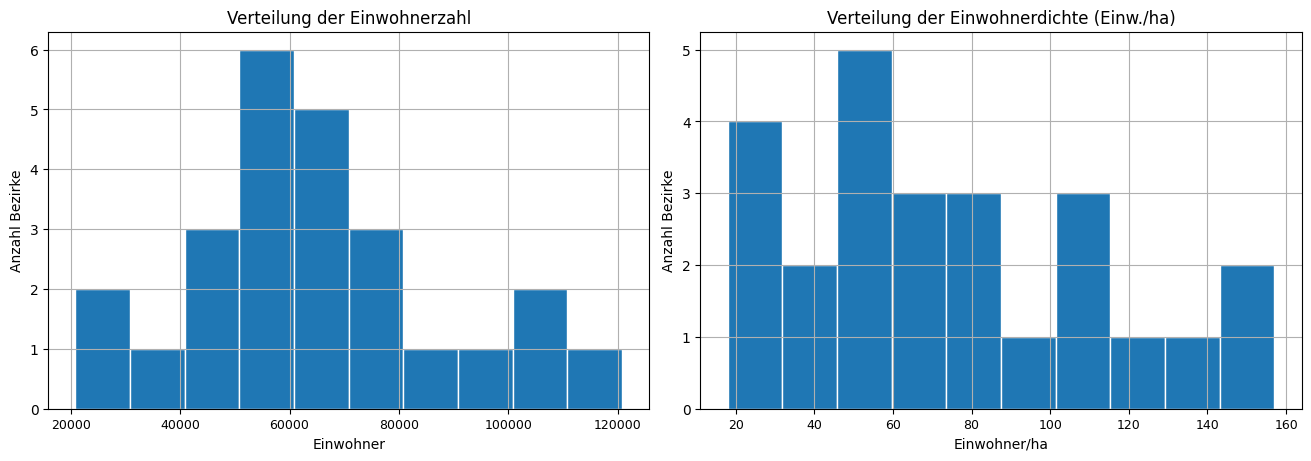

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4.5), constrained_layout=True)

gdf_clean["einwohner"].hist(bins=10, ax=axes[0], edgecolor="white")
axes[0].set_title("Verteilung der Einwohnerzahl")
axes[0].set_xlabel("Einwohner")
axes[0].set_ylabel("Anzahl Bezirke")
axes[0].tick_params(axis="x", labelsize=9)

gdf_clean["einwohnerdichte"].hist(bins=10, ax=axes[1], edgecolor="white")
axes[1].set_title("Verteilung der Einwohnerdichte (Einw./ha)")
axes[1].set_xlabel("Einwohner/ha")
axes[1].set_ylabel("Anzahl Bezirke")
axes[1].tick_params(axis="x", labelsize=9)

plt.show()


**Abbildung X: Verteilung der Einwohnerzahl in den Stadtbezirken**

**Beschreibung:**  
Das Histogramm zeigt, wie sich die Einwohnerzahl auf die 25 Münchner Stadtbezirke verteilt. Jeder Balken steht für einen Wertebereich der Einwohnerzahl, die Höhe für die Anzahl der Bezirke in diesem Bereich.

**Beobachtungen:**  
- Die meisten Stadtbezirke liegen im Bereich von ca. 50.000–80.000 Einwohnern.  
- Es gibt wenige Bezirke mit sehr niedrigen Einwohnerzahlen (z. B. Altstadt–Lehel) und einige mit deutlich höheren Werten (z. B. Ramersdorf–Perlach).  
- Insgesamt zeigt sich eine deutliche Spannweite, d. h. die Stadtbezirke unterscheiden sich erheblich in ihrer absoluten Bevölkerungsgröße.

**Abbildung X: Verteilung der Einwohnerdichte (Einw./ha) in den Stadtbezirken**

**Beschreibung:**  
Das Histogramm stellt die Verteilung der Einwohnerdichte (Einwohner pro Hektar) über alle Stadtbezirke dar. Die x-Achse zeigt Dichteintervalle, die y-Achse die Anzahl der Bezirke je Intervall.

**Beobachtungen:**  
- Die Einwohnerdichte reicht von etwa 20 bis über 150 Einw./ha und variiert damit deutlich zwischen den Bezirken.  
- Ein Teil der Bezirke bündelt sich im mittleren Bereich, einige wenige Bezirke weisen sehr hohe Dichtewerte auf (stark verdichtete, innenstadtnahe Lagen).  
- Die Verteilung unterstreicht, dass nicht nur die Einwohnerzahl, sondern auch die Flächenausdehnung stark differiert – ein wichtiger Kontext für spätere Analysen zur verfügbaren Infrastruktur pro Einwohner.


### Choropletenkarten

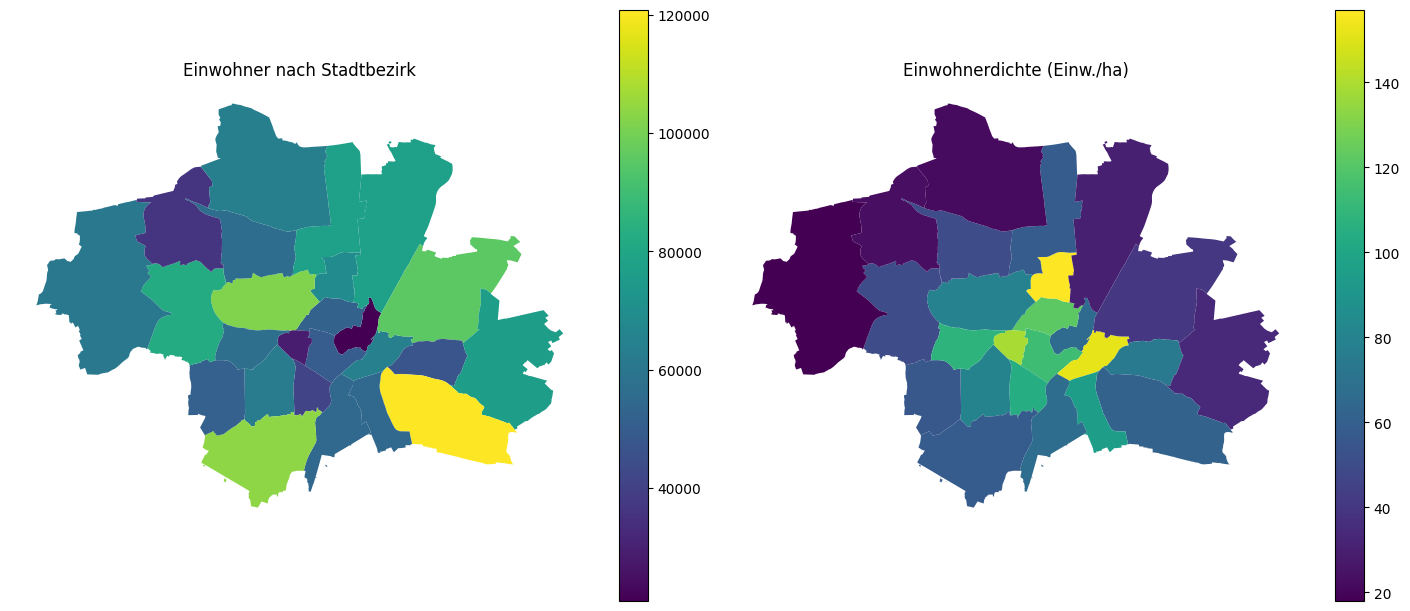

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

gdf_clean.plot(column="einwohner", legend=True, ax=axes[0])
axes[0].set_title("Einwohner nach Stadtbezirk")
axes[0].axis("off")

gdf_clean.plot(column="einwohnerdichte", legend=True, ax=axes[1])
axes[1].set_title("Einwohnerdichte (Einw./ha)")
axes[1].axis("off")

plt.show()


**Abbildung X: Einwohner nach Stadtbezirk**

**Beschreibung:**  
Die Choroplethenkarte zeigt die absolute Einwohnerzahl der 25 Münchner Stadtbezirke. Dunklere Farbtöne stehen für Bezirke mit vielen, hellere für Bezirke mit weniger Einwohnern.

**Beobachtungen:**  
- Besonders hohe Einwohnerzahlen finden sich in einigen großflächigen Randbezirken (z. B. im Osten und Südosten), während Altstadt–Lehel und einzelne innenstadtnahe Bezirke deutlich weniger Einwohner haben.  
- Die Verteilung der Einwohnerzahlen folgt damit nicht strikt einem „Innenstadt = viel, Außen = wenig“-Muster, sondern hängt stark von der Flächengröße und Bebauungsstruktur des jeweiligen Bezirks ab.

**Abbildung X: Einwohnerdichte (Einw./ha) nach Stadtbezirk**

**Beschreibung:**  
Diese Choroplethenkarte stellt die Einwohnerdichte (Einwohner pro Hektar) in den Stadtbezirken dar. Dunklere Farben markieren besonders dicht besiedelte Bezirke, hellere Farben Bezirke mit geringerer Dichte.

**Beobachtungen:**  
- Hohe Einwohnerdichten konzentrieren sich vor allem auf innenstadtnahe Bezirke, während peripher gelegene und flächenmäßig große Bezirke eine deutlich geringere Dichte aufweisen.  
- Im Vergleich zur Karte der absoluten Einwohnerzahl wird sichtbar, dass bevölkerungsreiche Bezirke nicht zwingend die höchste Dichte haben – einige kleinere Bezirke sind trotz geringerer Einwohnerzahl deutlich dichter bebaut.



### Bevölkerung & Dichte sortiert

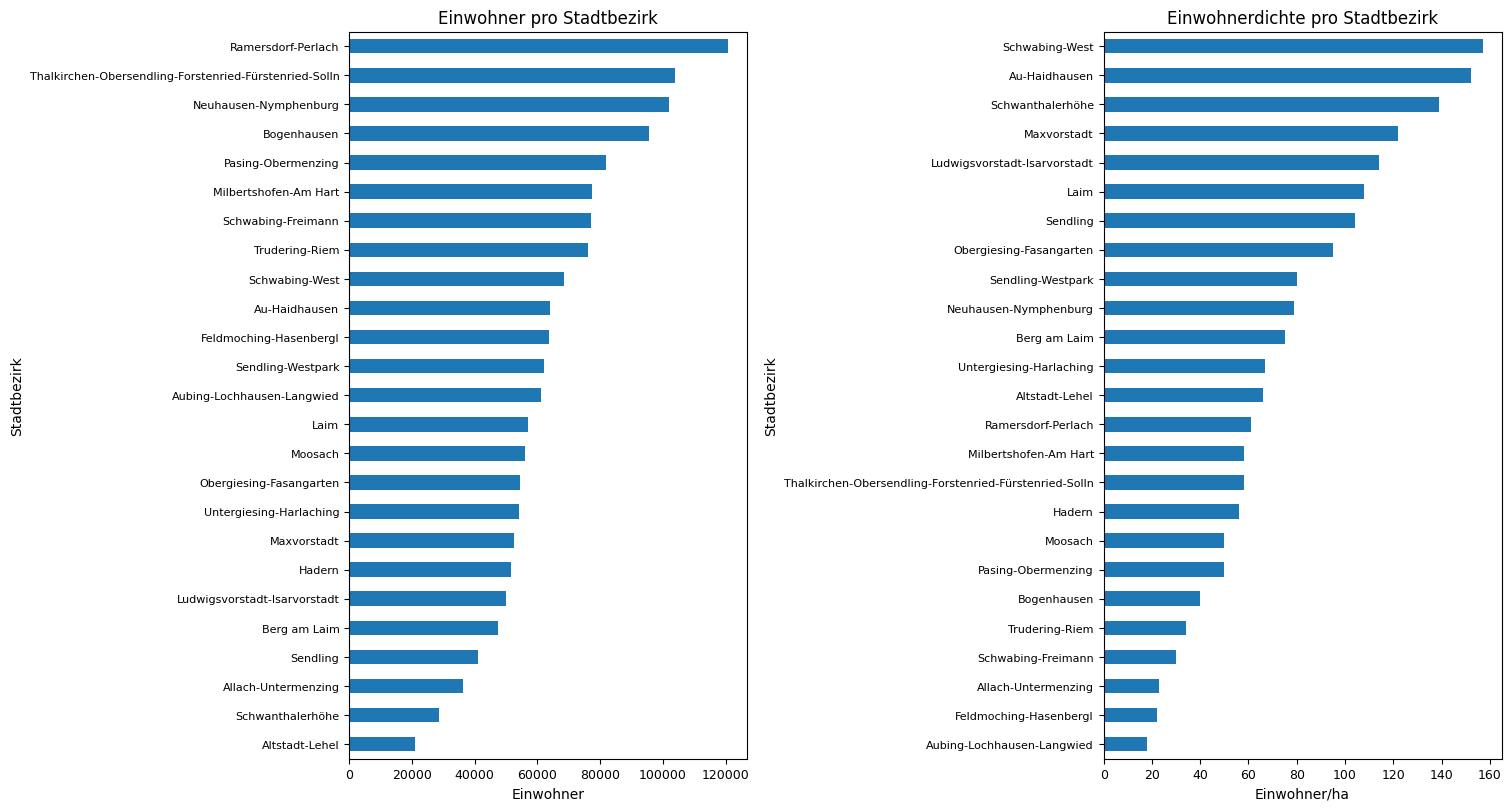

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), constrained_layout=True)

# Bevölkerung sortiert (horizontal für bessere Lesbarkeit)
df_bar_einw = (
    gdf_clean[["name", "einwohner"]]
    .sort_values("einwohner", ascending=True)
)
df_bar_einw.plot(kind="barh", x="name", y="einwohner", legend=False, ax=axes[0])
axes[0].set_xlabel("Einwohner")
axes[0].set_ylabel("Stadtbezirk")
axes[0].set_title("Einwohner pro Stadtbezirk")
axes[0].tick_params(axis="y", labelsize=8)
axes[0].tick_params(axis="x", labelsize=9)

# Einwohnerdichte sortiert (horizontal für bessere Lesbarkeit)
df_bar_dichte = (
    gdf_clean[["name", "einwohnerdichte"]]
    .sort_values("einwohnerdichte", ascending=True)
)
df_bar_dichte.plot(kind="barh", x="name", y="einwohnerdichte", legend=False, ax=axes[1])
axes[1].set_xlabel("Einwohner/ha")
axes[1].set_ylabel("Stadtbezirk")
axes[1].set_title("Einwohnerdichte pro Stadtbezirk")
axes[1].tick_params(axis="y", labelsize=8)
axes[1].tick_params(axis="x", labelsize=9)

plt.show()


**Abbildung X: Einwohnerzahl pro Stadtbezirk (absteigend sortiert)**

**Beschreibung:**  
Das Balkendiagramm zeigt die Einwohnerzahl der Münchner Stadtbezirke, absteigend nach Einwohnerzahl sortiert. Jeder Balken steht für einen Stadtbezirk.

**Beobachtungen:**  
- **Ramersdorf–Perlach**, **Pasing–Obermenzing** und **Neuhausen–Nymphenburg** zählen zu den bevölkerungsreichsten Bezirken mit jeweils rund 90.000 bis über 120.000 Einwohnern.  
- Bezirke wie **Altstadt–Lehel**, **Schwanthalerhöhe** und **Laim** haben im Vergleich deutlich weniger Einwohner und liegen am unteren Ende der Skala.  
- Die Unterschiede zwischen den Bezirken sind beträchtlich, was auf eine ungleich verteilte Bevölkerungszahl im Stadtgebiet hinweist.


**Abbildung X: Einwohnerdichte pro Stadtbezirk (absteigend sortiert)**

**Beschreibung:**  
Das Balkendiagramm stellt die Einwohnerdichte (Einwohner pro Hektar) in den Stadtbezirken dar, sortiert von der höchsten zur niedrigsten Dichte.

**Beobachtungen:**  
- Die höchste Einwohnerdichte weisen innenstadtnahe Bezirke wie **Schwabing-West**, **Maxvorstadt** und **Schwabing-Freimann** auf, die deutlich über 100 Einw./ha liegen.  
- Außenbezirke wie **Aubing–Lochhausen–Langwied**, **Feldmoching–Hasenbergl** oder **Allach–Untermenzing** haben deutlich geringere Dichtewerte und erscheinen am rechten Ende der Skala.  
- Im Vergleich zur absoluten Einwohnerzahl wird sichtbar, dass einige große, bevölkerungsreiche Bezirke (z. B. Ramersdorf–Perlach) nicht die höchste Dichte aufweisen, sondern eher ein mittleres Dichteniveau haben.



### Boxplots: Verteilung Einwohnerzahl & Einwohnerdichte

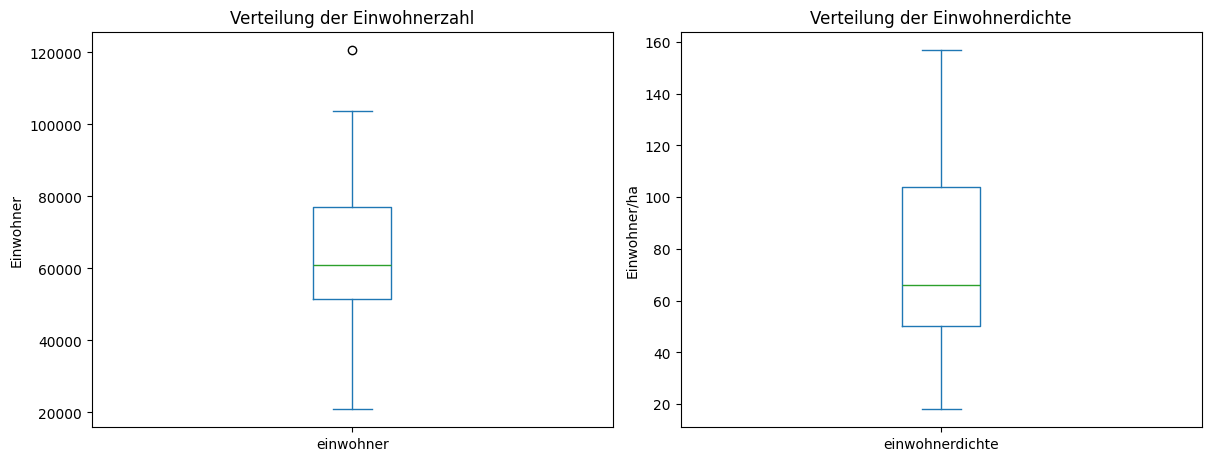

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5), constrained_layout=True)

gdf_clean[["einwohner"]].plot(kind="box", ax=axes[0])
axes[0].set_title("Verteilung der Einwohnerzahl")
axes[0].set_ylabel("Einwohner")

gdf_clean[["einwohnerdichte"]].plot(kind="box", ax=axes[1])
axes[1].set_title("Verteilung der Einwohnerdichte")
axes[1].set_ylabel("Einwohner/ha")

plt.show()


**Abbildung X: Boxplot der Einwohnerzahl der Stadtbezirke**

**Beschreibung:**  
Der Boxplot zeigt die Verteilung der Einwohnerzahl über alle 25 Stadtbezirke. Der Kasten markiert den Bereich zwischen dem 1. und 3. Quartil, die Linie im Kasten den Median, die „Whisker“ den übrigen Wertebereich ohne Ausreißer.

**Beobachtungen:**  
- Der Median der Einwohnerzahl liegt im Bereich von rund 60.000 Einwohnern pro Stadtbezirk.  
- Die Spannweite ist relativ groß: einige Bezirke haben nur etwas mehr als 20.000 Einwohner, während ein Bezirk mit über 120.000 Einwohnern als Ausreißer deutlich oberhalb der restlichen Werte liegt.  
- Insgesamt bestätigt der Boxplot die ungleiche Verteilung der Einwohnerzahlen, die bereits in den Balkendiagrammen sichtbar war.


**Abbildung X: Boxplot der Einwohnerdichte (Einw./ha) der Stadtbezirke**

**Beschreibung:**  
Der Boxplot stellt die Verteilung der Einwohnerdichte (Einwohner pro Hektar) dar. Wieder geben Quartile, Median und Whisker den zentralen Bereich und die Streuung der Werte an.

**Beobachtungen:**  
- Der Median der Einwohnerdichte liegt bei rund 60–70 Einw./ha.  
- Die Werte streuen deutlich: einige Bezirke weisen sehr geringe Dichten (unter 30 Einw./ha) auf, während besonders dichte Bezirke Werte von über 150 Einw./ha erreichen.  
- Der Boxplot unterstreicht damit, dass die Stadtbezirke sich nicht nur hinsichtlich der absoluten Einwohnerzahl, sondern auch in der Dichte stark unterscheiden – ein wichtiger Kontext für die spätere Bewertung „aktivitätsfördernder“ Infrastruktur pro Fläche und Einwohner.



## Plausibilitätscheck 



In [23]:
# Plausibilitaetscheck (clean)

# Erwartete Struktur
required_cols = ["bez_nr", "name", "einwohner", "flaeche_ha", "einwohnerdichte", "geometry"]
missing_cols = [c for c in required_cols if c not in gdf_clean.columns]
assert not missing_cols, f"Fehlende Spalten: {missing_cols}"

# Schluessel, Groesse, Nullwerte
assert len(gdf_clean) == 25, f"Erwartet 25 Bezirke, gefunden: {len(gdf_clean)}"
assert gdf_clean["bez_nr"].is_unique, "bez_nr ist nicht eindeutig"
assert gdf_clean["bez_nr"].notna().all(), "bez_nr enthaelt Nullwerte"

# Wertebereiche
assert (gdf_clean["einwohner"] > 0).all(), "einwohner <= 0 gefunden"
assert (gdf_clean["flaeche_ha"] > 0).all(), "flaeche_ha <= 0 gefunden"
assert (gdf_clean["einwohnerdichte"] > 0).all(), "einwohnerdichte <= 0 gefunden"

# Dichte-Konsistenz: einwohnerdichte als Einw./ha, flaeche_ha als ha
calc_density_ha = gdf_clean["einwohner"] / gdf_clean["flaeche_ha"]
abs_diff = (calc_density_ha - gdf_clean["einwohnerdichte"]).abs()
rel_diff = abs_diff / gdf_clean["einwohnerdichte"]

max_abs = float(abs_diff.max())
max_rel = float(rel_diff.max())
mean_rel = float(rel_diff.mean())

# Toleranz fuer Rundung/Quellunterschiede
assert max_rel < 0.05, (
    "Dichteabweichung zu hoch: "
    f"max_rel={max_rel:.2%}, mean_rel={mean_rel:.2%}, max_abs={max_abs:.2f}"
)

# Geometrie
assert gdf_clean.geometry.notna().all(), "Leere Geometrien gefunden"
assert gdf_clean.is_valid.all(), "Ungueltige Geometrien gefunden"

print("Plausibilitaetscheck bestanden")
print("Einheitenannahme: einwohnerdichte = Einw./ha, flaeche_ha = ha")
print(f"Max rel. Abweichung: {max_rel:.2%}")
print(f"Mean rel. Abweichung: {mean_rel:.2%}")
print(f"Max abs. Abweichung: {max_abs:.2f}")


Plausibilitaetscheck bestanden
Einheitenannahme: einwohnerdichte = Einw./ha, flaeche_ha = ha
Max rel. Abweichung: 1.95%
Mean rel. Abweichung: 0.38%
Max abs. Abweichung: 0.49


###  Bereinigten Stadtbezirks-Datensatz mit Einwohnern etc. im `interim`-Ordner speichern:


In [24]:
INTERIM_DIR.mkdir(parents=True, exist_ok=True)

out_path = INTERIM_DIR / "muc_bezirke_bev_clean.geojson"
gdf_clean.to_file(out_path, driver="GeoJSON")
out_path


PosixPath('../data/interim/muc_bezirke_bev_clean.geojson')